# Below code is an effort to Automate the SATV Manual calculation. 

Most often we recieve escalations regarding SATV miscalculation, which hapenned due to system issues and known bugs.
On those times Response Management team have to calculate the SATV manually. On an avegare team members have to spend 2-3 hours calculating SATV manually.

#### Problem Statement : 
Manual SATV calculations are prone to mistakes/miscalculation resulting in wrong interpretation of SATV enetitlement at a cost of 2 hours per agreement.

#### Solution :
We have created a Python Based solution which will automate all the manual processes used for SATV calculation.

#### Impact :
Precise and Time saving

#### Assumptions : 
Agreement Invoiced purchase data pulled out from EMCcore and saved in a current working directory.

#### Feature Addition :
    1) Logic for Licenses with NON pool will also be incorporated for SATV Calculation.
    2) Code optimization.
    3) Automating manual part of Planning Services and 24*7 PRS calculation.
    
#### We have used EA# 8507528 INC21546675 for testing

In [1]:
# function to insert Threshold as per License Count

def threshold(LicenseCount):
    if 1 <= LicenseCount <= 249:
        return("1 to 249")
    elif 250 <= LicenseCount <= 2399:
        return("250 to 2399")
    elif 2400 <= LicenseCount <= 5999:
        return("2400 to 5999")
    elif 6000 <= LicenseCount <= 14999:
        return("6000 to 14999")
    elif 15000 <= LicenseCount <= 29999:
        return("15000 to 29999")
    elif 30000 <= LicenseCount <= 49999:
        return("30000 to 49999")
    elif 50000 <= LicenseCount <= 99999:
        return("50000 to 99999")
    elif 100000 <= LicenseCount <= 199999:
        return("100000 to 199999")
    elif 200000 <= LicenseCount <= 399999:
        return("200000 to 399999")
    elif 400000 <= LicenseCount <= 599999:
        return("400000 to 599999")
    else:
        return("600000+")

In [2]:
# function to insert TV Days as per APP pool threshold

def caltvdaysapp(LicenseCount):
    if 1 <= LicenseCount <= 249:
        return int(round(2*(LicenseCount/50)))
    elif 250 <= LicenseCount <= 2399:
        return 20
    elif 2400 <= LicenseCount <= 5999:
        return 30
    elif 6000 <= LicenseCount <= 14999:
        return 50
    elif 15000 <= LicenseCount <= 29999:
        return 110
    elif 30000 <= LicenseCount <= 49999:
        return 160
    elif 50000 <= LicenseCount <= 99999:
        return 250
    elif 100000 <= LicenseCount <= 199999:
        return 400
    elif 200000 <= LicenseCount <= 399999:
        return 600
    elif 400000 <= LicenseCount <= 599999:
        return 800
    else:
        return 1400

In [3]:
# function to insert TV Days as per SYS pool threshold

def caltvdayssys(LicenseCount):
    if 1 <= LicenseCount <= 249:
        return int(round(1*(LicenseCount/50)))
    elif 250 <= LicenseCount <= 2399:
        return 10
    elif 2400 <= LicenseCount <= 5999:
        return 15
    elif 6000 <= LicenseCount <= 14999:
        return 25
    elif 15000 <= LicenseCount <= 29999:
        return 55
    elif 30000 <= LicenseCount <= 49999:
        return 80
    elif 50000 <= LicenseCount <= 99999:
        return 125
    elif 100000 <= LicenseCount <= 199999:
        return 200
    elif 200000 <= LicenseCount <= 399999:
        return 300
    elif 400000 <= LicenseCount <= 599999:
        return 400
    else:
        return 700

In [4]:
# Importing liberary
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pyodbc

In [5]:
#creating connection with SQL Server to pull data

connection = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=emccore.partners.extranet.microsoft.com;"
                      "Database=warehouse;"
                      "Trusted_Connection=yes;")

# Query for getting SA-Training Vouchers eligible purchases for an agreement
# Note : Please enter agreement number in question e.g. for this case 8507528

query = """SELECT 
AGR.AgreementNumber, AGR.StartEffectiveDate, AGR.EndEffectiveDate,
POLI.SAMStatusCode, POLI.CoveragePeriodStartDate, POLI.CoveragePeriodEndDate, PO.PurchaseOrderNumber,POLI.PartNumber, ITEM.ProductFamilyCode,
ITEM.ProductFamilyName, POLI.ExtendedLicenseCount,POLineItemStatusCode, POLI.LastModifiedDate,ITEM.PoolCode, 
POLI.LastRefreshDate,  ITEM.ProductTypeCode
FROM Warehouse.dbo.AgreementBase AGR WITH (NOLOCK) 
INNER JOIN Warehouse.dbo.PurchaseOrderLineItemBase POLI WITH (NOLOCK) ON AGR.AgreementKey = POLI.AgreementKey
INNER JOIN Warehouse.dbo.Item ITEM WITH (NOLOCK) ON POLI.ItemKey = ITEM.ItemKey
INNER JOIN Warehouse.dbo.PurchaseOrderBase PO WITH (NOLOCK) ON PO.PurchaseOrderID = POLI.PurchaseOrderID
WHERE AGR.AgreementNumber = '8507528'
AND POLI.POLineItemStatusCode IN ('PLI','PLS')
AND POLI.CoveragePeriodEndDate IS NOT NULL
AND ITEM.ProductFamilyCode IN (
SELECT DISTINCT SUBSTRING(ParameterValue,1,3) FROM Entitlement.dbo.ControlParameter WITH (NOLOCK) WHERE ParentParameterNumber = (52100)
UNION
SELECT DISTINCT SUBSTRING(ParameterValue,1,3) FROM Entitlement.dbo.ControlParameter WITH (NOLOCK) WHERE ParentParameterNumber = (52300)
)
ORDER BY POLI.PoliUsageDate DESC,ITEM.PoolCode"""

#Getting data into the dataframe for processing

data = pd.read_sql_query(sql=query,con=connection)


		Visualizing license count year wise and APP/SYS Pool wise


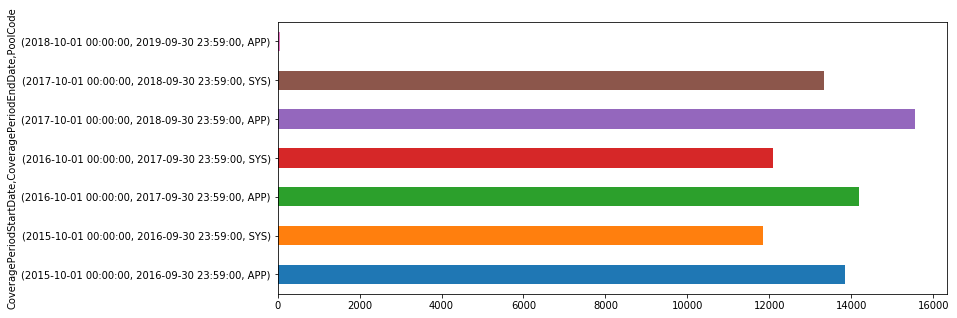


	SATV Eligible License count year wise: 
 ----------------------------------------------------------------------------
                                                        ExtendedLicenseCount
CoveragePeriodStartDate CoveragePeriodEndDate PoolCode                      
2015-10-01              2016-09-30 23:59:00   APP                      13838
                                              SYS                      11838
2016-10-01              2017-09-30 23:59:00   APP                      14198
                                              SYS                      12080
2017-10-01              2018-09-30 23:59:00   APP                      15560
                                              SYS                      13342
2018-10-01              2019-09-30 23:59:00   APP                         50


In [6]:
print("\n\t\tVisualizing license count year wise and APP/SYS Pool wise")
data.groupby(['CoveragePeriodStartDate','CoveragePeriodEndDate','PoolCode'])['ExtendedLicenseCount'].sum().plot(kind='barh',figsize=(12,5))
plt.show()
#Lets see the invoiced license count year wise 
print("\n\tSATV Eligible License count year wise: \n",'-'*76)
#print(data.groupby(['CoveragePeriodStartDate','CoveragePeriodEndDate','PoolCode'])['ExtendedLicenseCount'].sum())
lcount = pd.DataFrame(data.groupby(['CoveragePeriodStartDate','CoveragePeriodEndDate','PoolCode'])['ExtendedLicenseCount'].sum())
print(lcount)

In [7]:
# Data processing to calculate the TV Eligibility
datagp = data.groupby(by=['CoveragePeriodStartDate','CoveragePeriodEndDate','PoolCode'])
datapool = pd.DataFrame(datagp.ExtendedLicenseCount.sum())
datapool['Threshold']=datapool.ExtendedLicenseCount.apply(threshold)
datapool.reset_index(inplace=True)
datapool.loc[datapool.PoolCode=='APP','TVDays'] = datapool.ExtendedLicenseCount.apply(caltvdaysapp)
datapool.loc[datapool.PoolCode=='SYS','TVDays'] = datapool.ExtendedLicenseCount.apply(caltvdayssys)
gp = datapool.groupby(['CoveragePeriodStartDate','CoveragePeriodEndDate','PoolCode'])
print("\n\tCalculating SATV year wise for the Invoiced Purchases\n",'-'*65)
result = pd.DataFrame(gp.TVDays.sum())
result.reset_index(inplace=True)
print(result,"\n")
prevtotal = int(result.iloc[4:6,3].sum()) #previous year eligibility
currtotal = int(result.iloc[6,3].sum()) #current year eligibility
agmlength = int((data.EndEffectiveDate[0] - data.StartEffectiveDate[0]).days/365)
asondate = int((data.EndEffectiveDate[0] - datetime.datetime.now()).days/365)
curr = agmlength - asondate
print("Agreement is of {} Year duration, Start Date/End was {} / {} respectively\n".format(agmlength,data.StartEffectiveDate[0],data.EndEffectiveDate[0]))
if int((data.EndEffectiveDate[0] - datetime.datetime.now()).days/365) == 1:
    print("Currently agreement is in 4th year previous term eligibility was {} days,current term eligibility is {} days\n".format(prevtotal,currtotal))
    print("Hence as per proration logic current Eligibility is: ", prevtotal+(currtotal*(1/3)))
elif int((data.EndEffectiveDate[0] - data.StartEffectiveDate[0]).days/365) == 0:
    print("Agreement is in 5th year:\n")
    print("Hence as per proration logic current Eligibility is: ", prevtotal+(currtotal*(2/3)))
else:
    pass
    #print(gp.TVDays.sum())


	Calculating SATV year wise for the Invoiced Purchases
 -----------------------------------------------------------------
  CoveragePeriodStartDate CoveragePeriodEndDate PoolCode  TVDays
0              2015-10-01   2016-09-30 23:59:00      APP    50.0
1              2015-10-01   2016-09-30 23:59:00      SYS    25.0
2              2016-10-01   2017-09-30 23:59:00      APP    50.0
3              2016-10-01   2017-09-30 23:59:00      SYS    25.0
4              2017-10-01   2018-09-30 23:59:00      APP   110.0
5              2017-10-01   2018-09-30 23:59:00      SYS    25.0
6              2018-10-01   2019-09-30 23:59:00      APP     2.0 

Agreement is of 5 Year duration, Start Date/End was 2015-10-01 00:00:00 / 2020-09-30 23:59:00 respectively

Currently agreement is in 4th year previous term eligibility was 135 days,current term eligibility is 2 days

Hence as per proration logic current Eligibility is:  135.66666666666666
